In [95]:
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import remez
import math
from scipy.signal import freqz
from pylab import *

8.82 0.05668934240362812


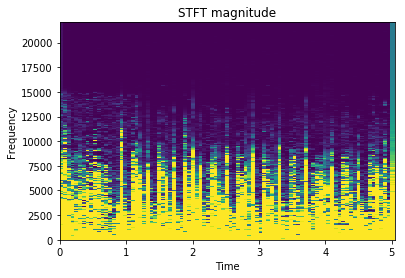

In [215]:
# read data from wav file
fs, data = wavfile.read('spongebob.wav')
data = data[:,0]

# STFT
amp = 2 * np.sqrt(2)
f, t, Zxx = signal.stft(data, fs, nperseg=5000)
print(f[2] - f[1], t[1])
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title("STFT magnitude")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()

220500


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


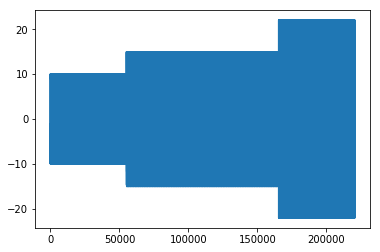

In [195]:
f1, f2, f3 = 1000, 4000, 10000
amps = [10, 15, 22]
ls13 = np.linspace(0,int(len(data)/4), len(data)/4)
ls2 = np.linspace(0, int(len(data)/2), len(data)/2)

n1 = np.cos((2*np.pi*f1*ls13)/fs)*amps[0]
n2 = np.cos((2*np.pi*f2*ls2)/fs)*amps[1]
n3 = np.cos((2*np.pi*f3*ls13)/fs)*amps[2]
noises = np.array([])
noises = np.append(noises, n1)
noises = np.append(noises, n2)
noises = np.append(noises, n3)
print(len(noises))
plt.plot(noises)

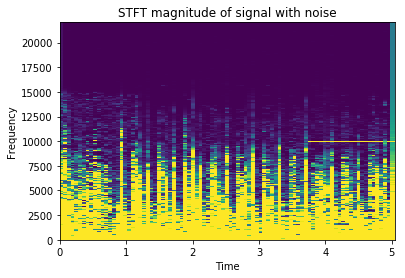

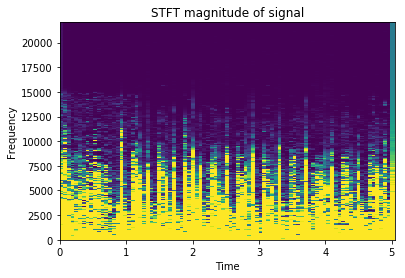

In [210]:
# noised record
n_data = data + noises
f2, t2, Zxx2 = signal.stft(n_data, fs, nperseg=5000)
plt.pcolormesh(t2, f2, np.abs(Zxx2), vmin=0, vmax=amp)
plt.title("STFT magnitude of signal with noise")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()

f, t, Zxx = signal.stft(data, fs, nperseg=5000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title("STFT magnitude of signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()

In [201]:
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency ')
    title(r'Frequency response')
    

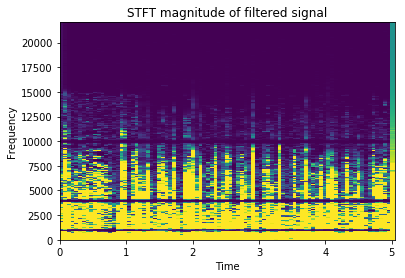

In [220]:

n = 501
filter1 = signal.firwin(n, cutoff = [800, 1200], window = 'hamming', pass_zero = True, fs = fs)
filter2 = signal.firwin(n, cutoff = [3800, 4200], window = 'hamming', pass_zero = True, fs = fs)
filter3 = signal.firwin(n, cutoff = [9800, 10200], window = 'hamming', pass_zero = True, fs = fs)
filtered_x = signal.lfilter(filter1, 1.0, n_data)
filtered_x = signal.lfilter(filter2, 1.0, filtered_x)
filtered_x = signal.lfilter(filter3, 1.0, filtered_x)

f3, t3, Zxx3 = signal.stft(filtered_x, fs, nperseg=5000)
plt.pcolormesh(t3, f3, np.abs(Zxx3), vmin=0, vmax=amp)
plt.title("STFT magnitude of filtered signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()


normalized_filtered = filtered_x / max(np.abs(filtered_x))

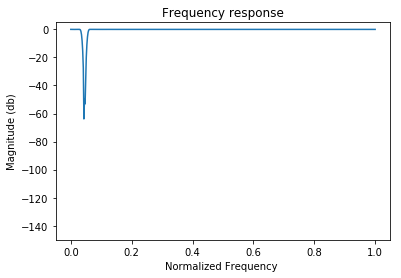

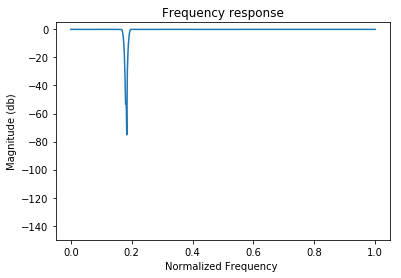

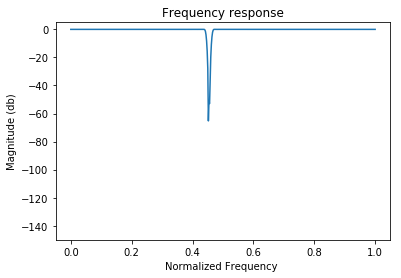

In [221]:
# plot filters
mfreqz(filter1)
show()
mfreqz(filter2)
show()
mfreqz(filter3)
show()


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


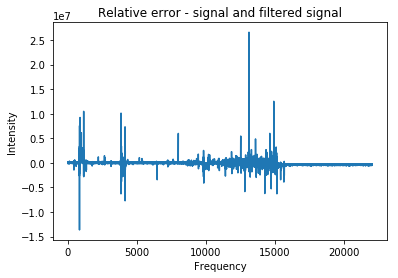

In [203]:
n = len(data)
k = np.arange(n)
T = n/fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

err_data = np.abs(np.fft.fft(filtered_x)/n - np.fft.fft(data)/2)/(np.fft.fft(filtered_x)/n)
err_data = err_data[range(int(len(err_data)/2))]
plt.plot(frq, err_data)
plt.title("Relative error - signal and filtered signal")
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.show()

In [204]:
#save to wav file
wavfile.write("filtered.wav", fs, normalized_filtered)